# <h1 style='background:#8F312E; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:white'><center>Laptop Specs and latest price</center></h1>
# AMRAOUI Taher

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import plotly
import plotly.express as px


In [ ]:
data = pd.read_csv('cars.csv')
train = data.iloc[:, 1:]

Let's look at the data.

In [ ]:
train

array([['Maruti Alto', 'Maruti', 'Alto', ..., 46.3, 5, 120000],
       ['Hyundai Grand', 'Hyundai', 'Grand', ..., 82.0, 5, 550000],
       ['Hyundai i20', 'Hyundai', 'i20', ..., 80.0, 5, 215000],
       ...,
       ['Skoda Rapid', 'Skoda', 'Rapid', ..., 103.52, 5, 425000],
       ['Mahindra XUV500', 'Mahindra', 'XUV500', ..., 140.0, 7, 1225000],
       ['Honda City', 'Honda', 'City', ..., 117.6, 5, 1200000]],
      dtype=object)

The data are presented by 896 objects according to 23 features.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  price              15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [ ]:
train.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


Let's check the information for gaps.

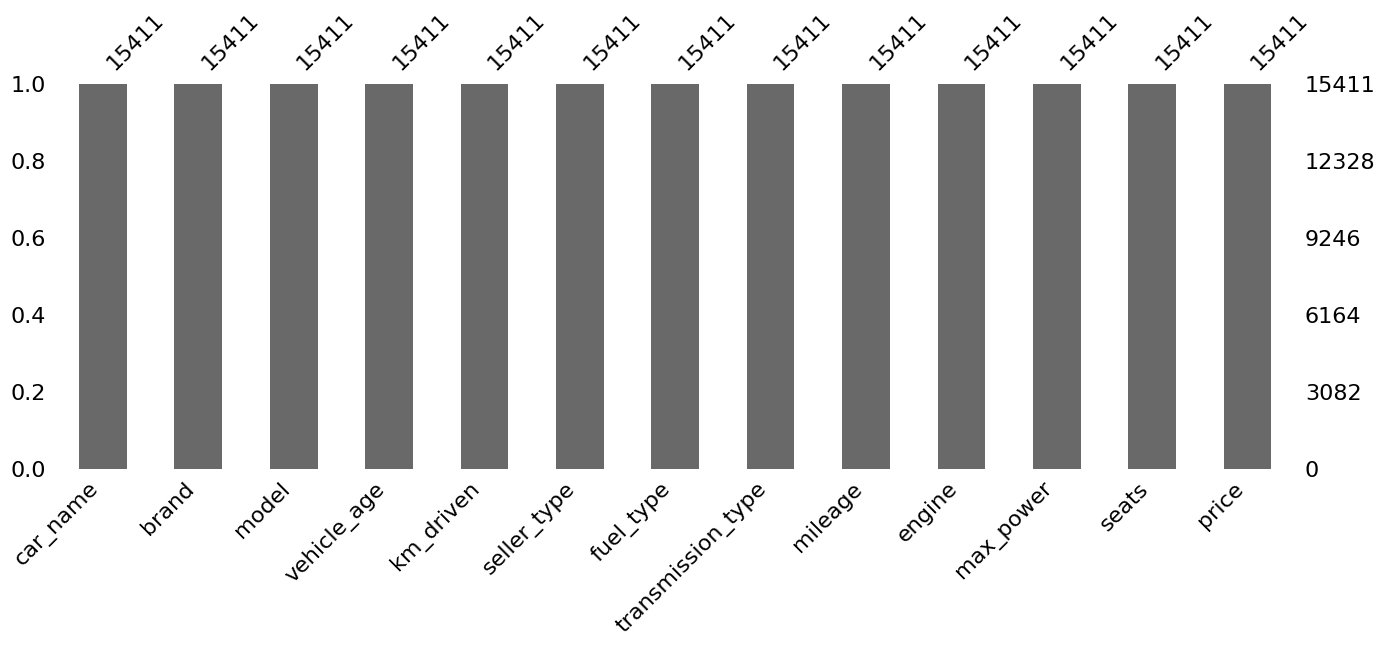

In [ ]:
msno.bar(train, figsize = (16,5))
plt.show()

In [ ]:
train.duplicated().sum()

np.int64(167)

In [ ]:
train=train.drop_duplicates(keep='last')

In [ ]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'car_name' has '121' unique values
Feature 'brand' has '32' unique values
Feature 'model' has '120' unique values
Feature 'vehicle_age' has '24' unique values
Feature 'km_driven' has '3688' unique values
Feature 'seller_type' has '3' unique values
Feature 'fuel_type' has '5' unique values
Feature 'transmission_type' has '2' unique values
Feature 'mileage' has '411' unique values
Feature 'engine' has '110' unique values
Feature 'max_power' has '342' unique values
Feature 'seats' has '8' unique values
Feature 'price' has '1086' unique values


In [ ]:
numeric=['vehicle_age', 'km_driven','mileage', 'engine', 'max_power','seats','price']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

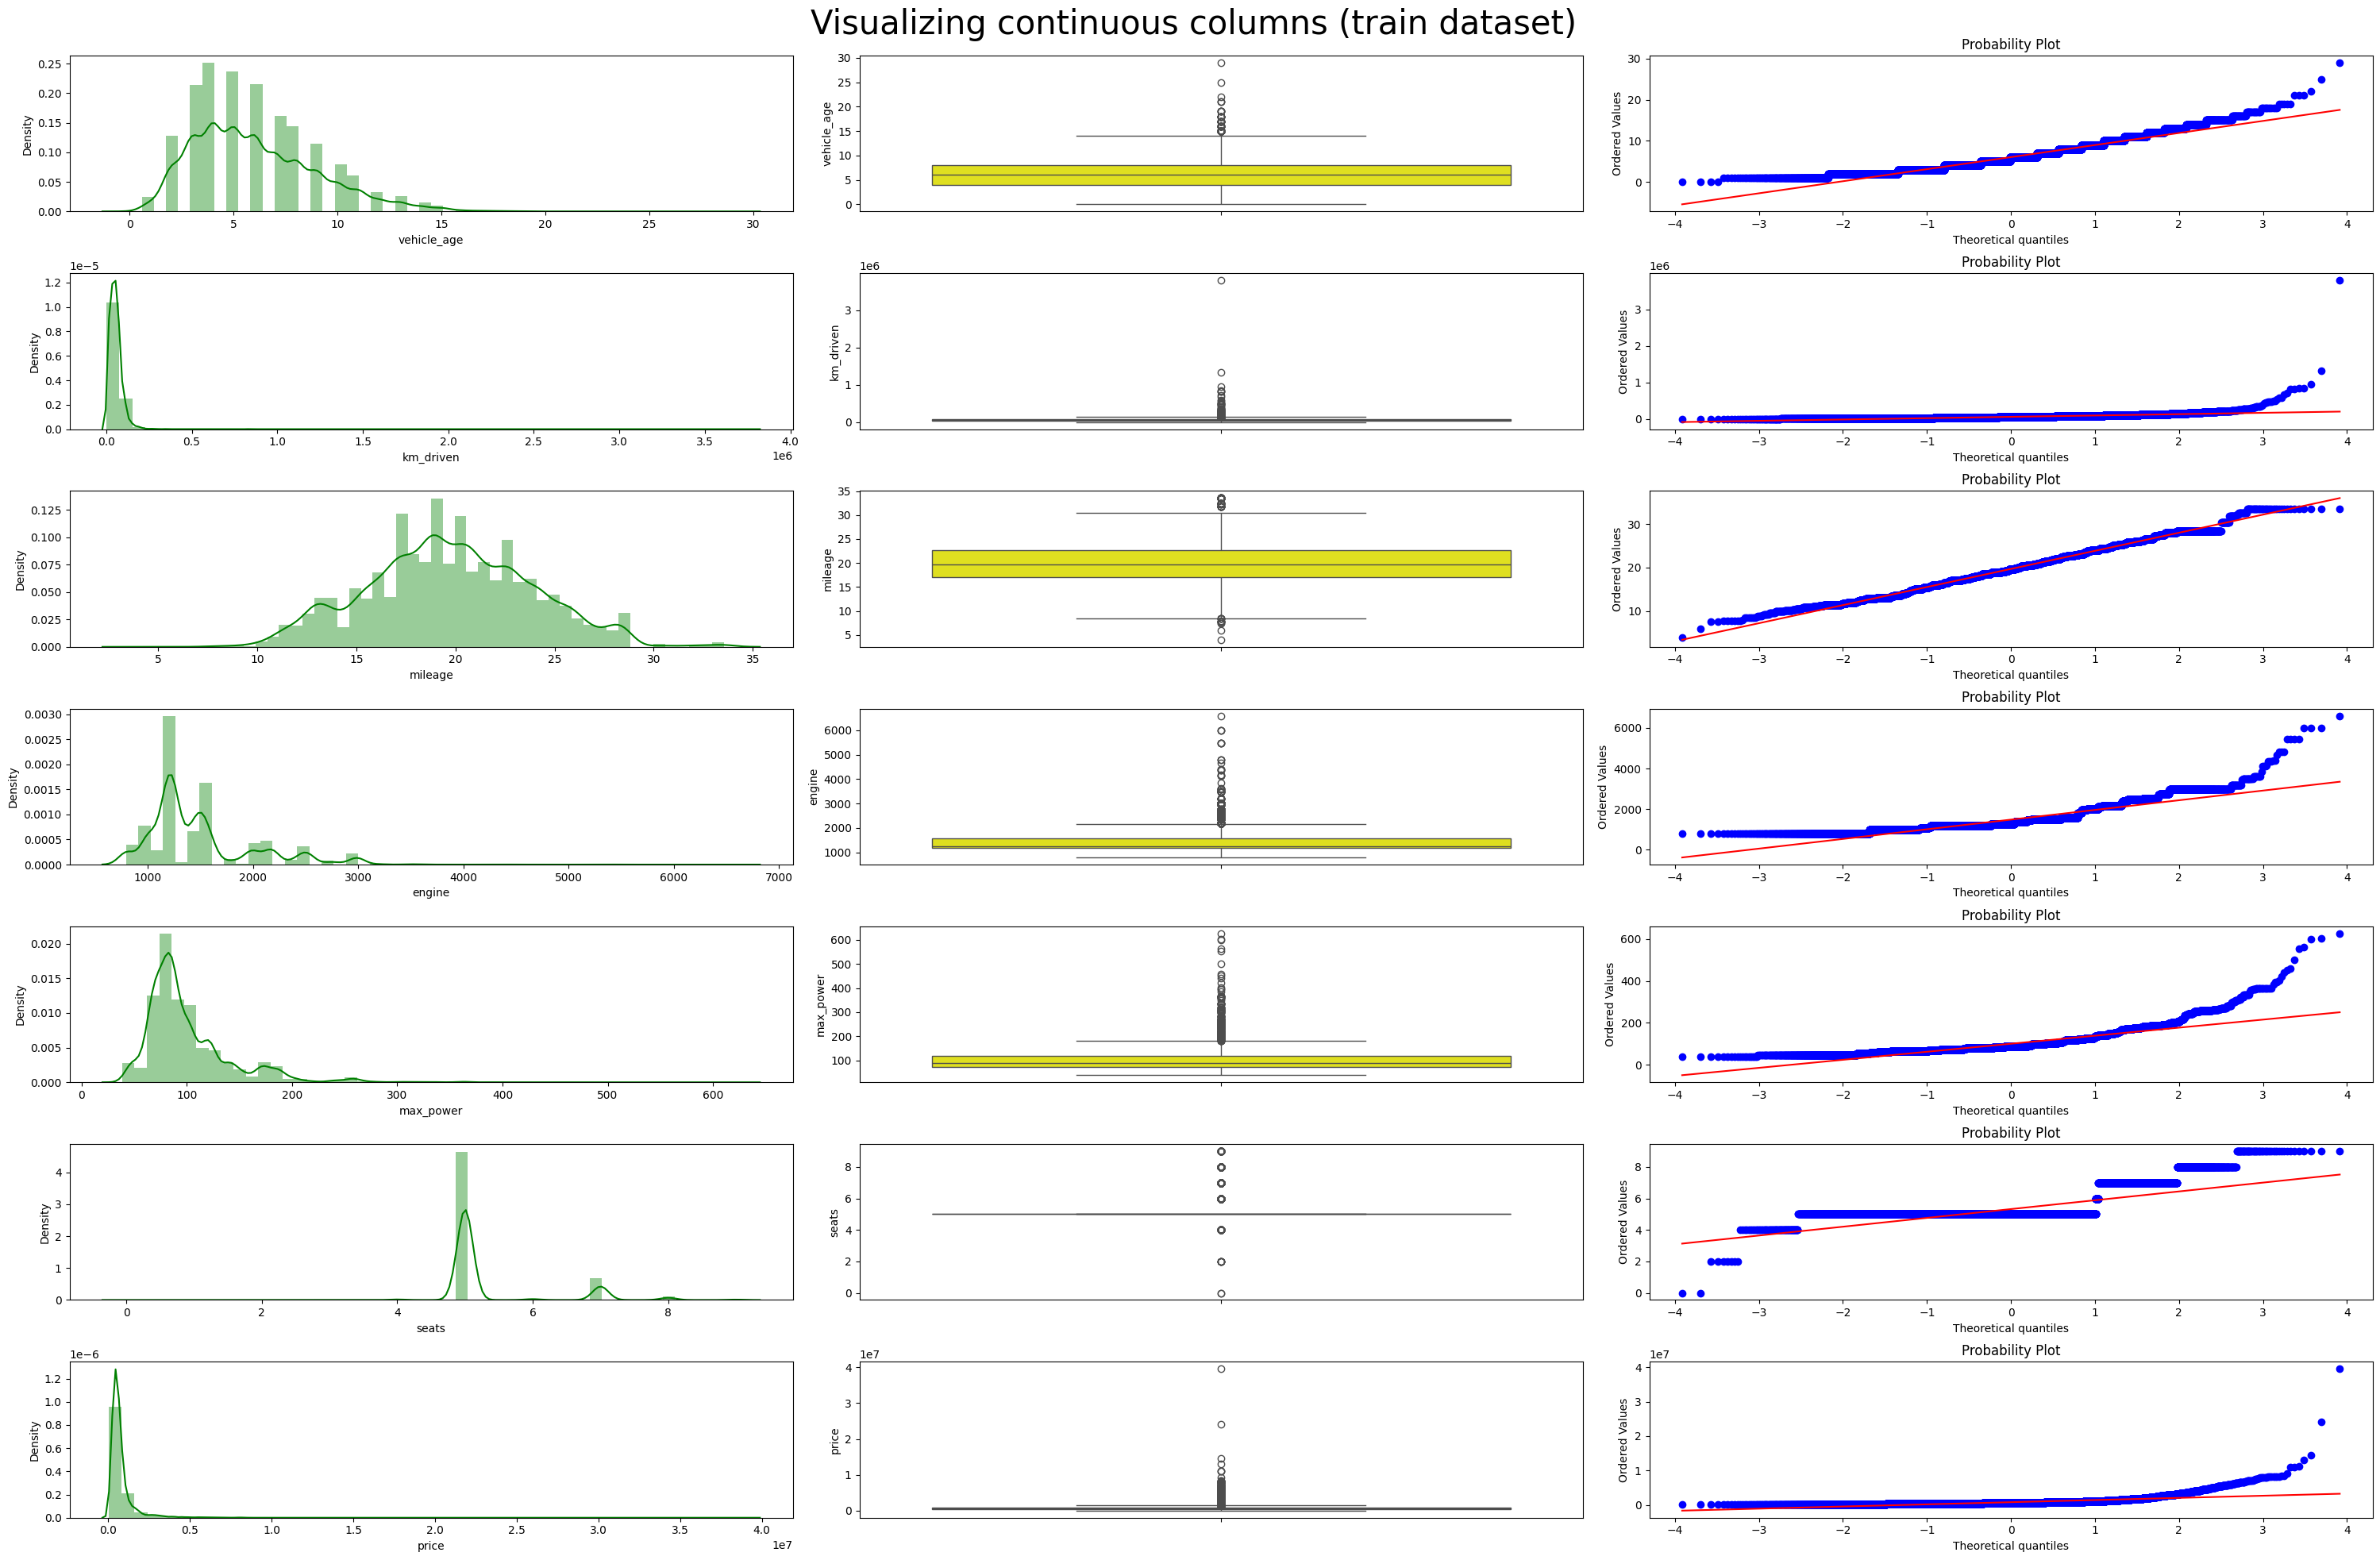

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric),3,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    stats.probplot(train[i],plot=ax[index,2])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

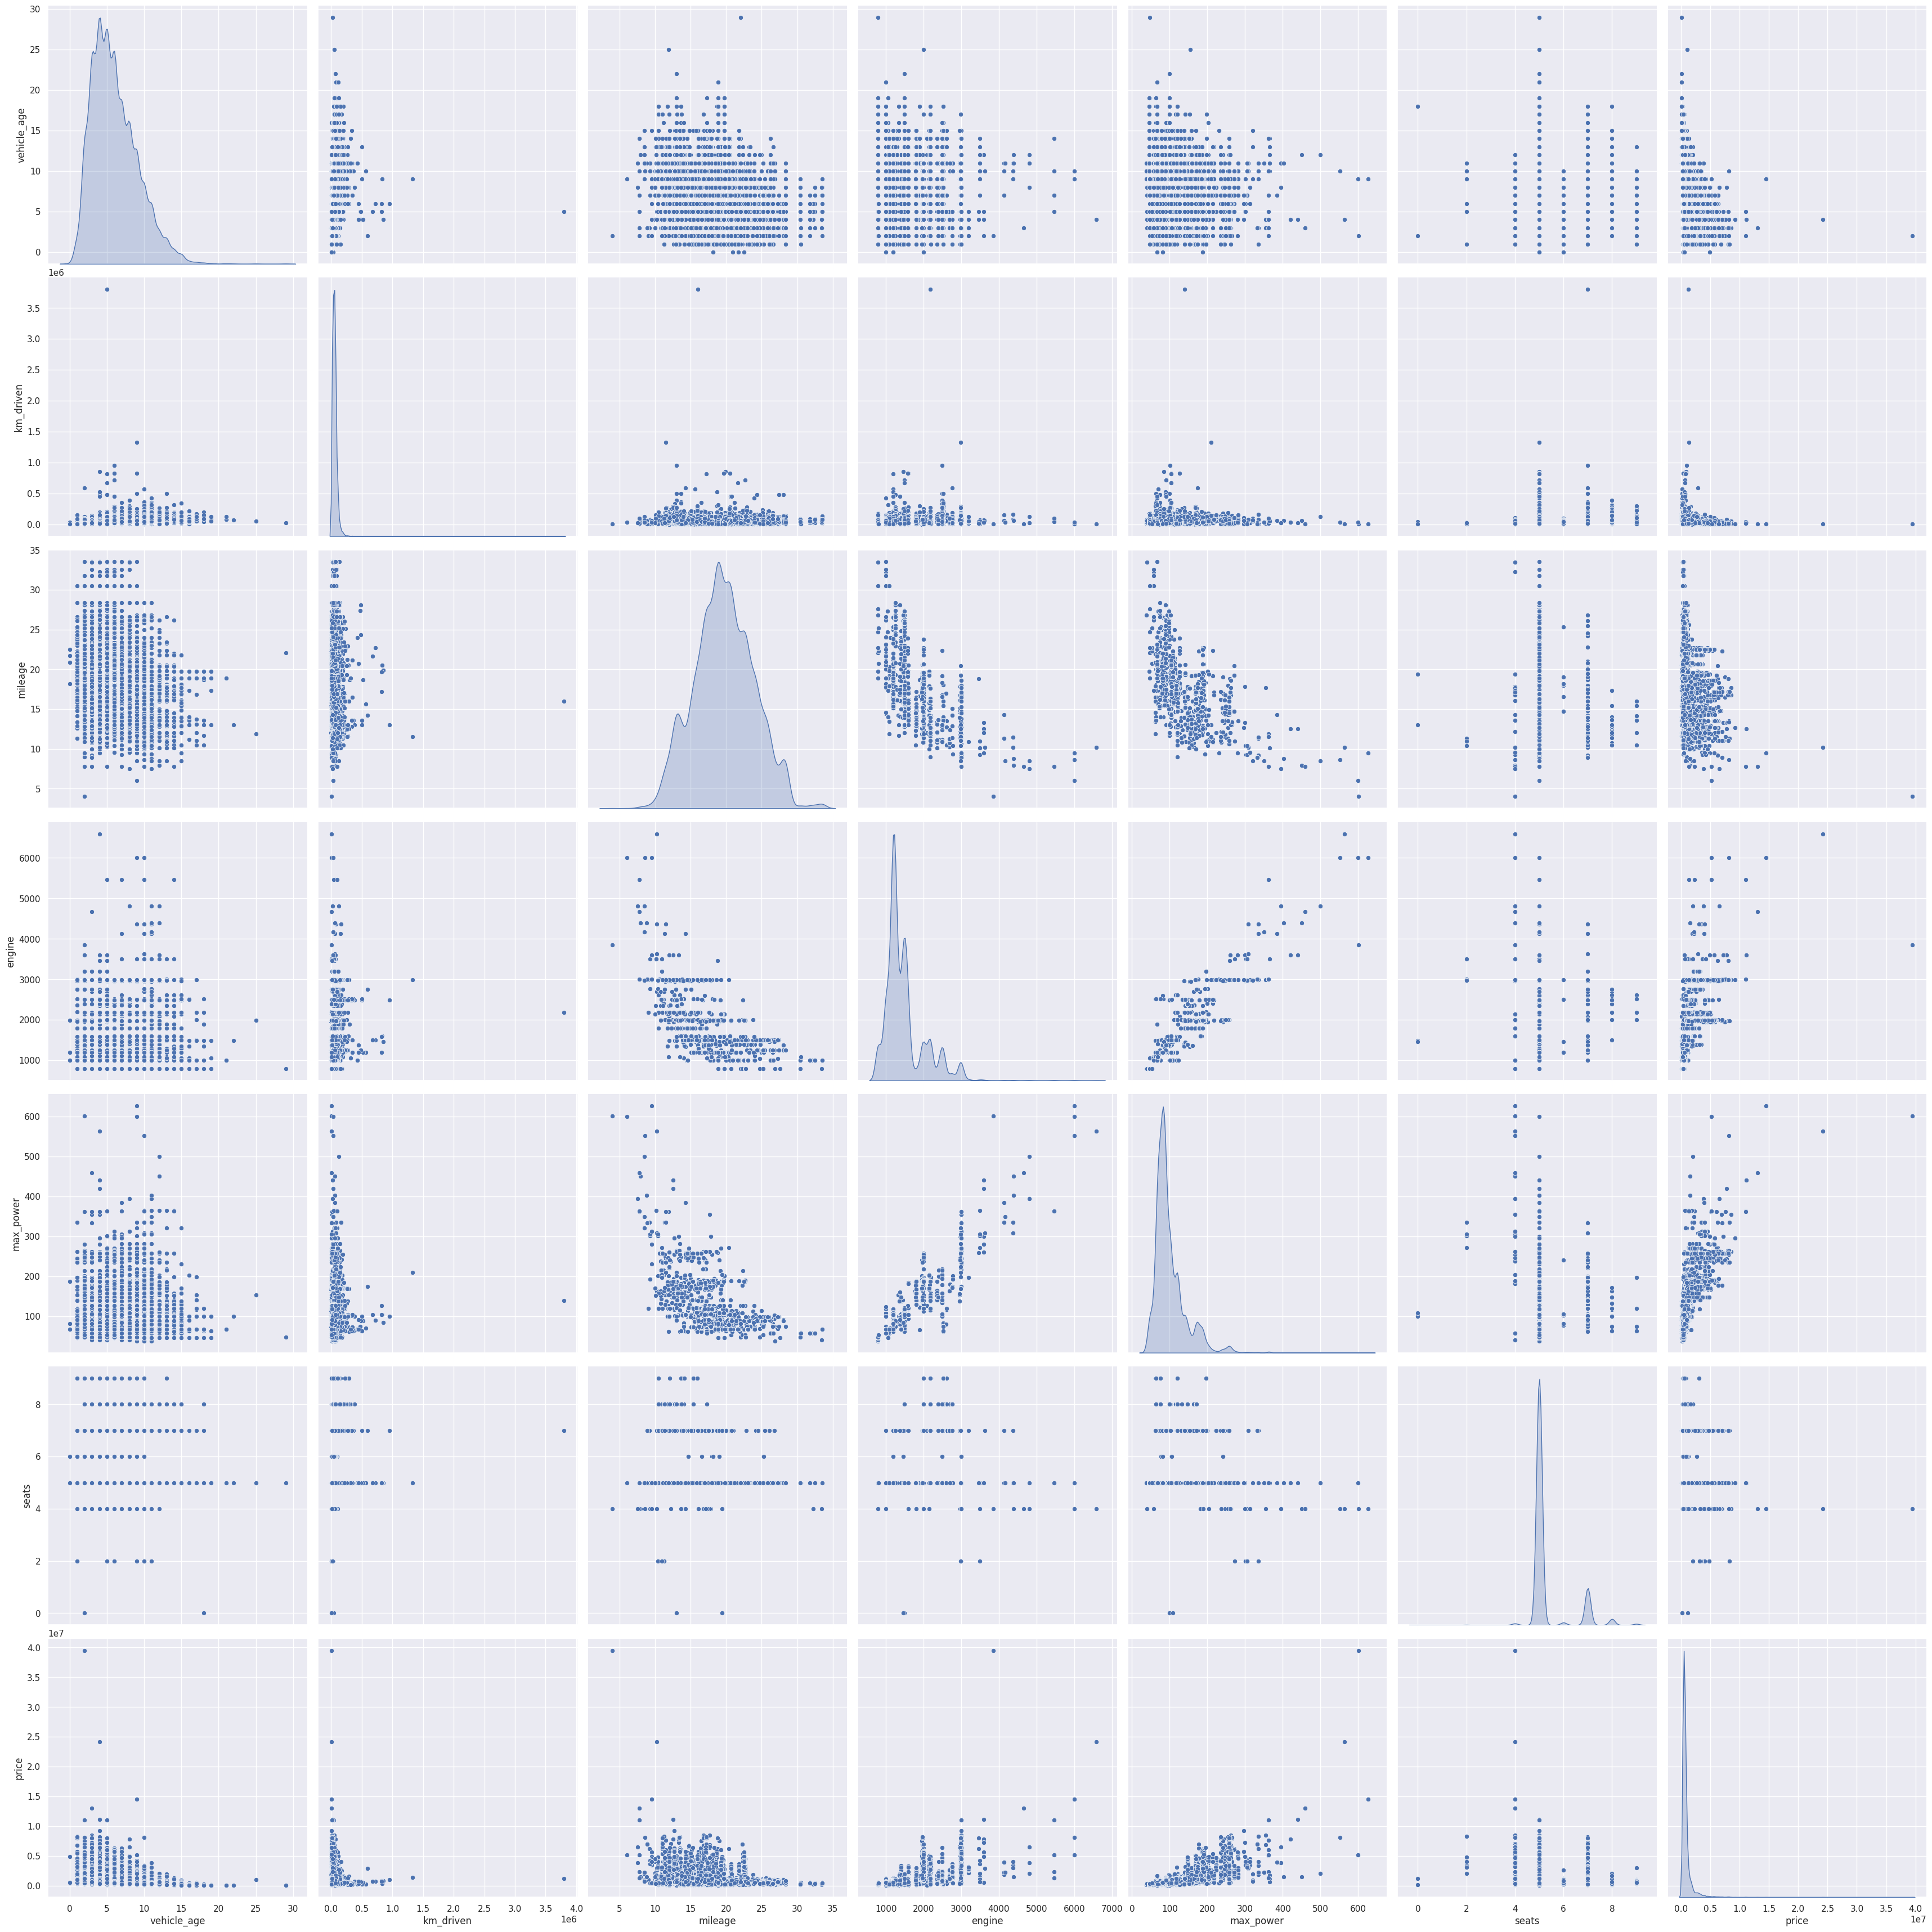

In [ ]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [ ]:
categorical_features=['car_name', 'brand', 'model',
       'seller_type', 'fuel_type', 'transmission_type']

<Figure size 1500x2500 with 0 Axes>

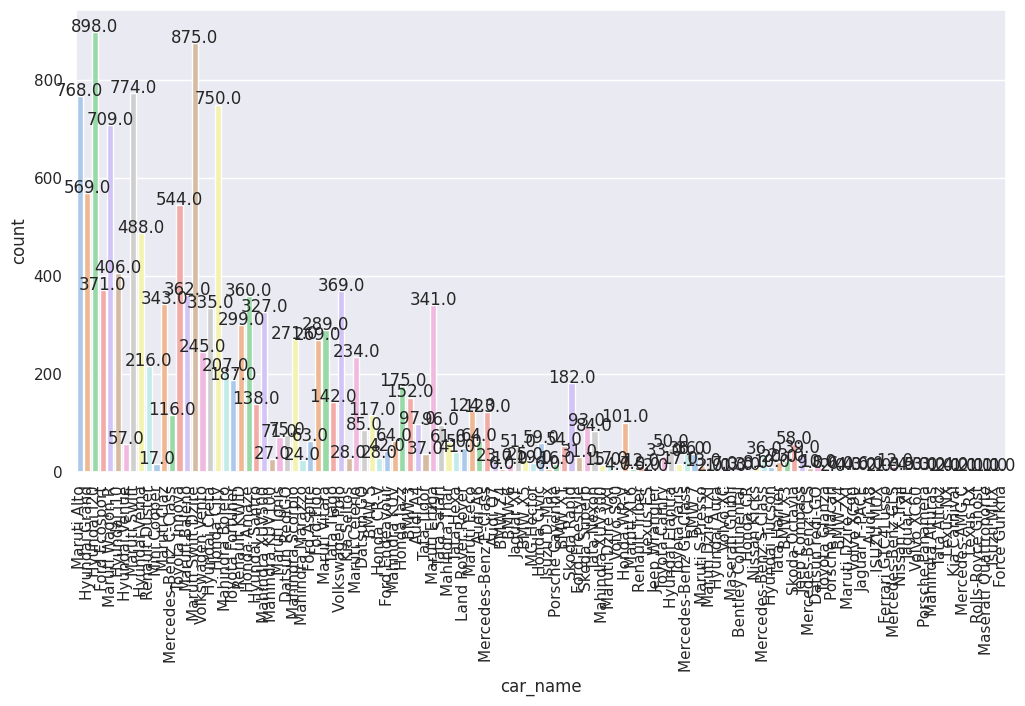

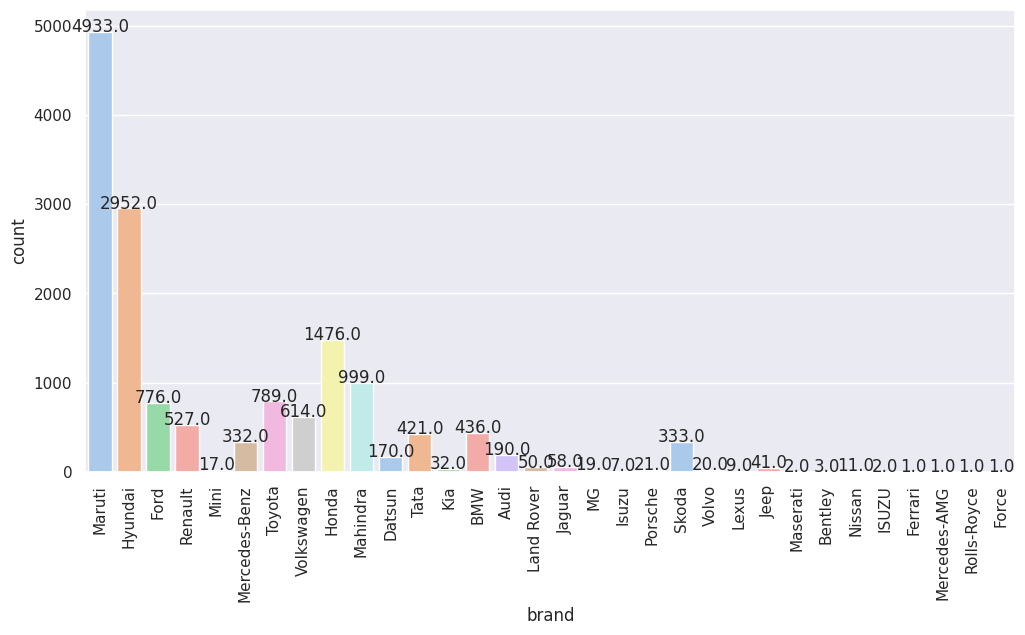

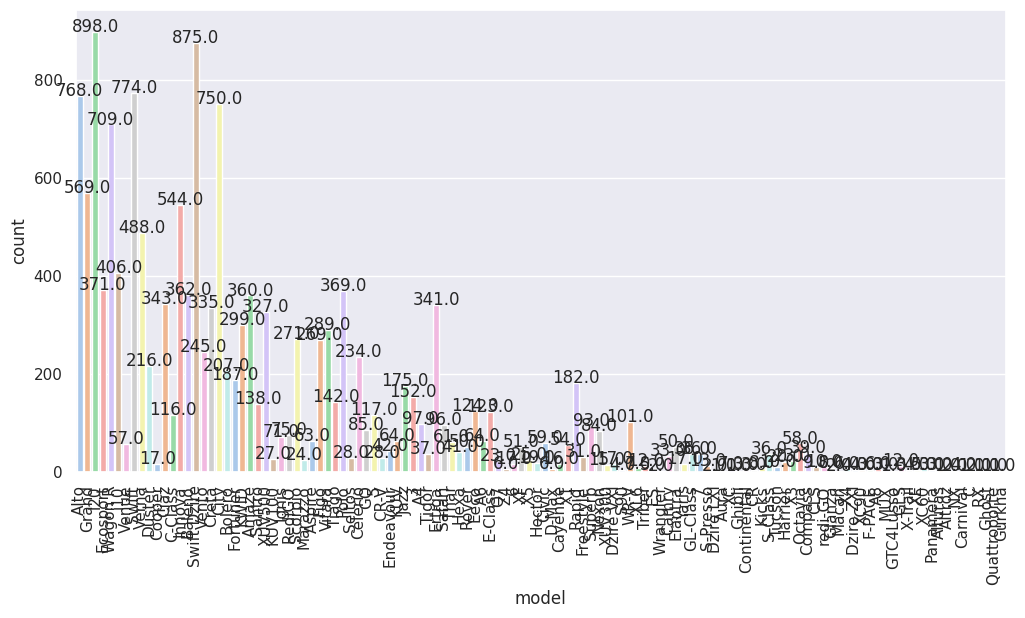

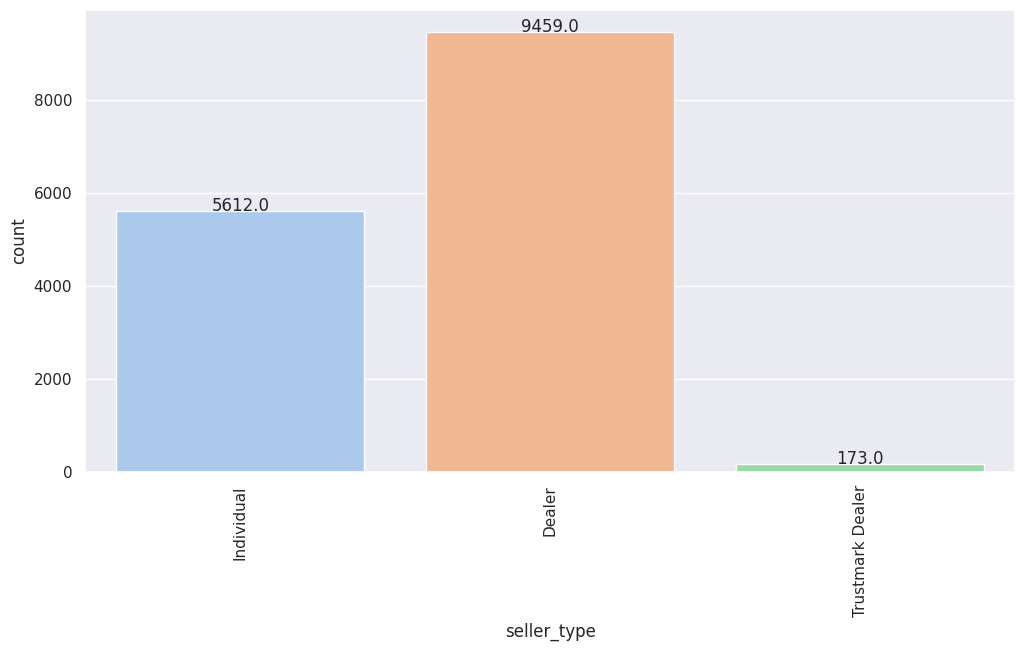

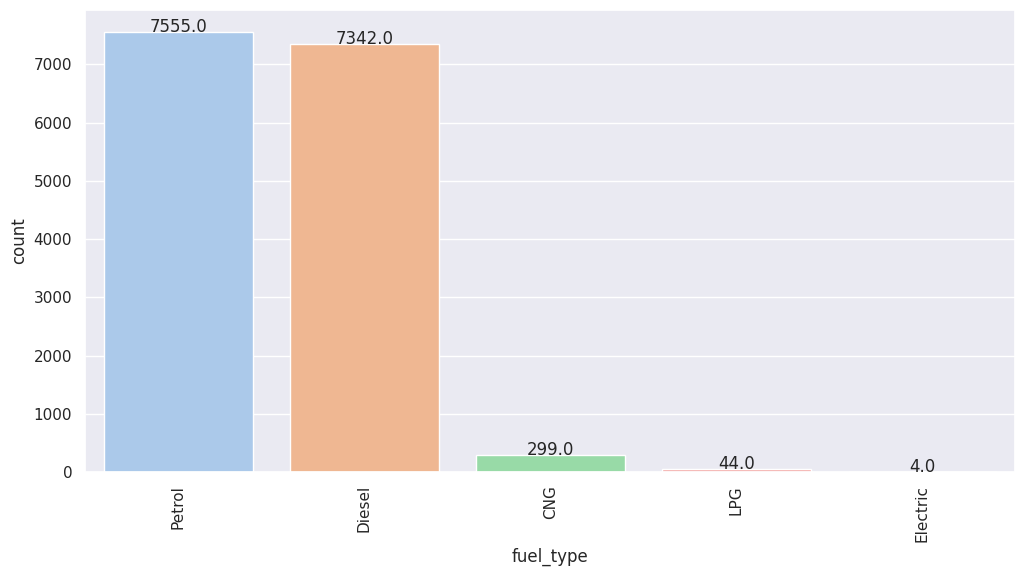

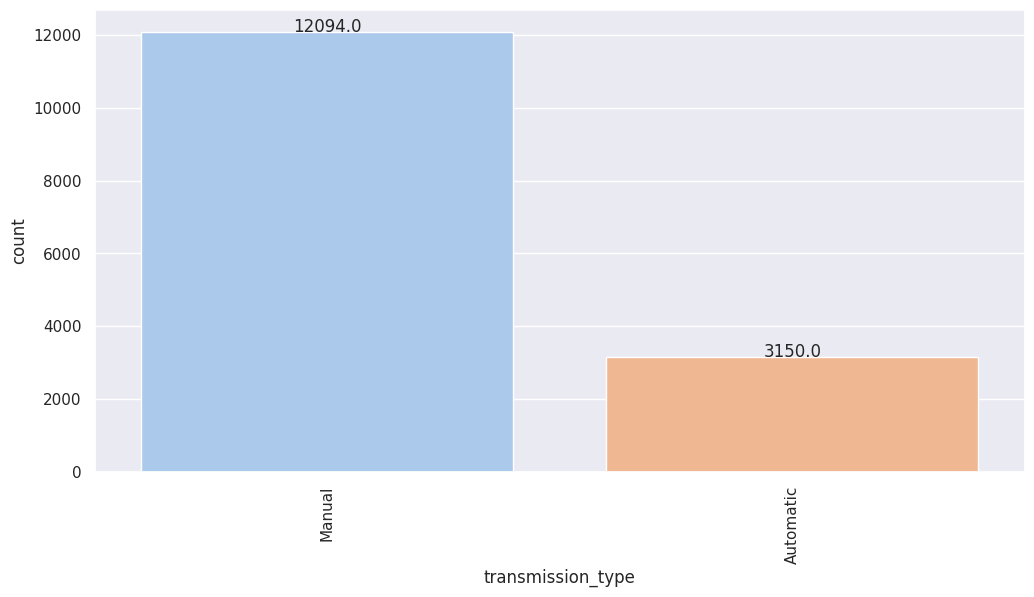

In [ ]:
i=1
plt.figure(figsize = (15,25))
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(12,6))
  graph = sns.countplot(ax=ax1,x = feature , data = train,palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
  i+=1

Text(0.5, 1.0, 'Top 10 Expensive cars')

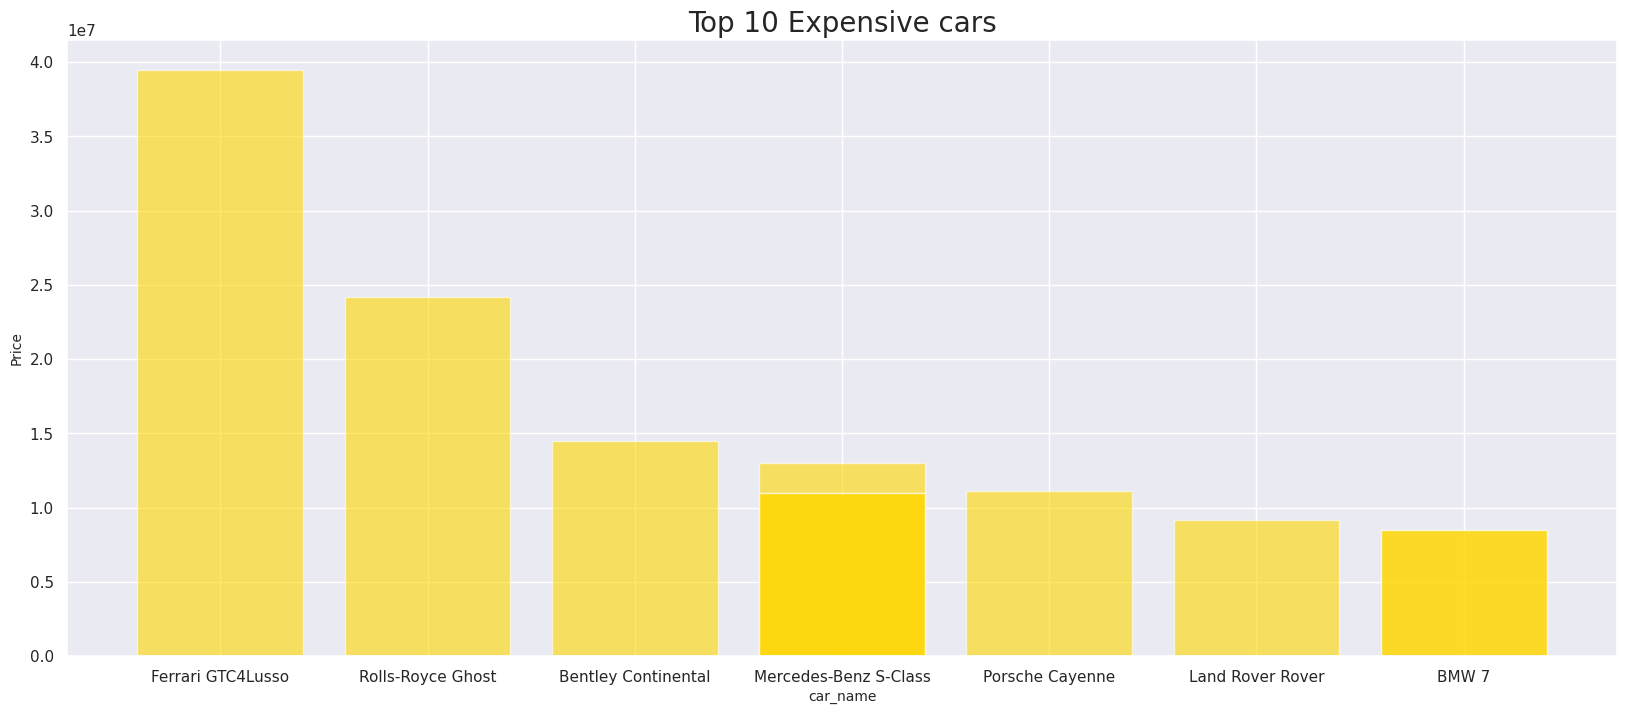

In [ ]:
top10 = train.nlargest(10,'price')
plt.figure(figsize=(20,8))
plt.bar(top10['car_name'], top10['price'],color='gold',alpha=0.6)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("car_name", fontsize = 10)
plt.title("Top 10 Expensive cars", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Cheap cars')

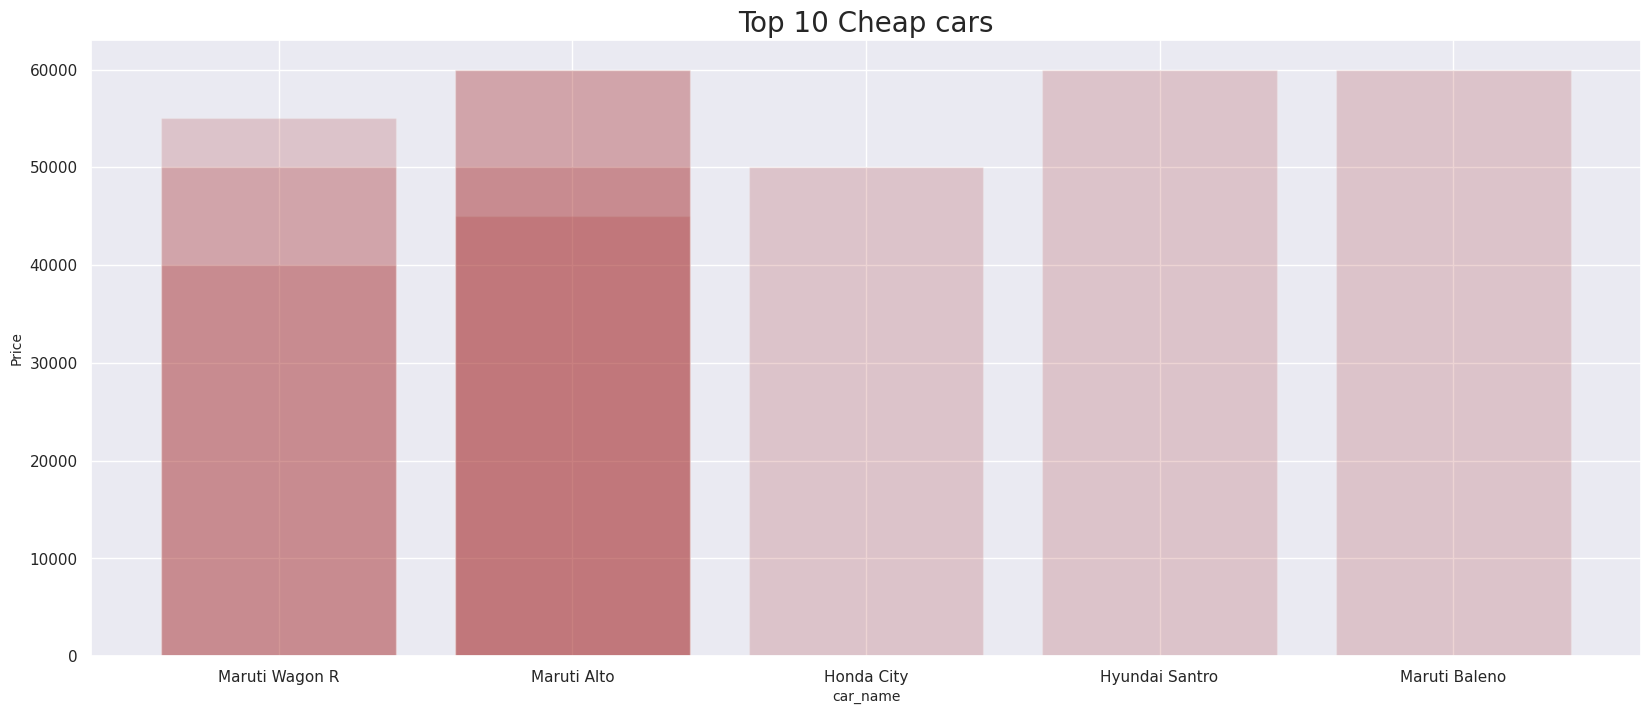

In [ ]:
top10 = train.nsmallest(10,'price')
plt.figure(figsize=(20,8))
plt.bar(top10['car_name'], top10['price'],color='brown',alpha=0.2)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("car_name", fontsize = 10)
plt.title("Top 10 Cheap cars", fontsize = 20)

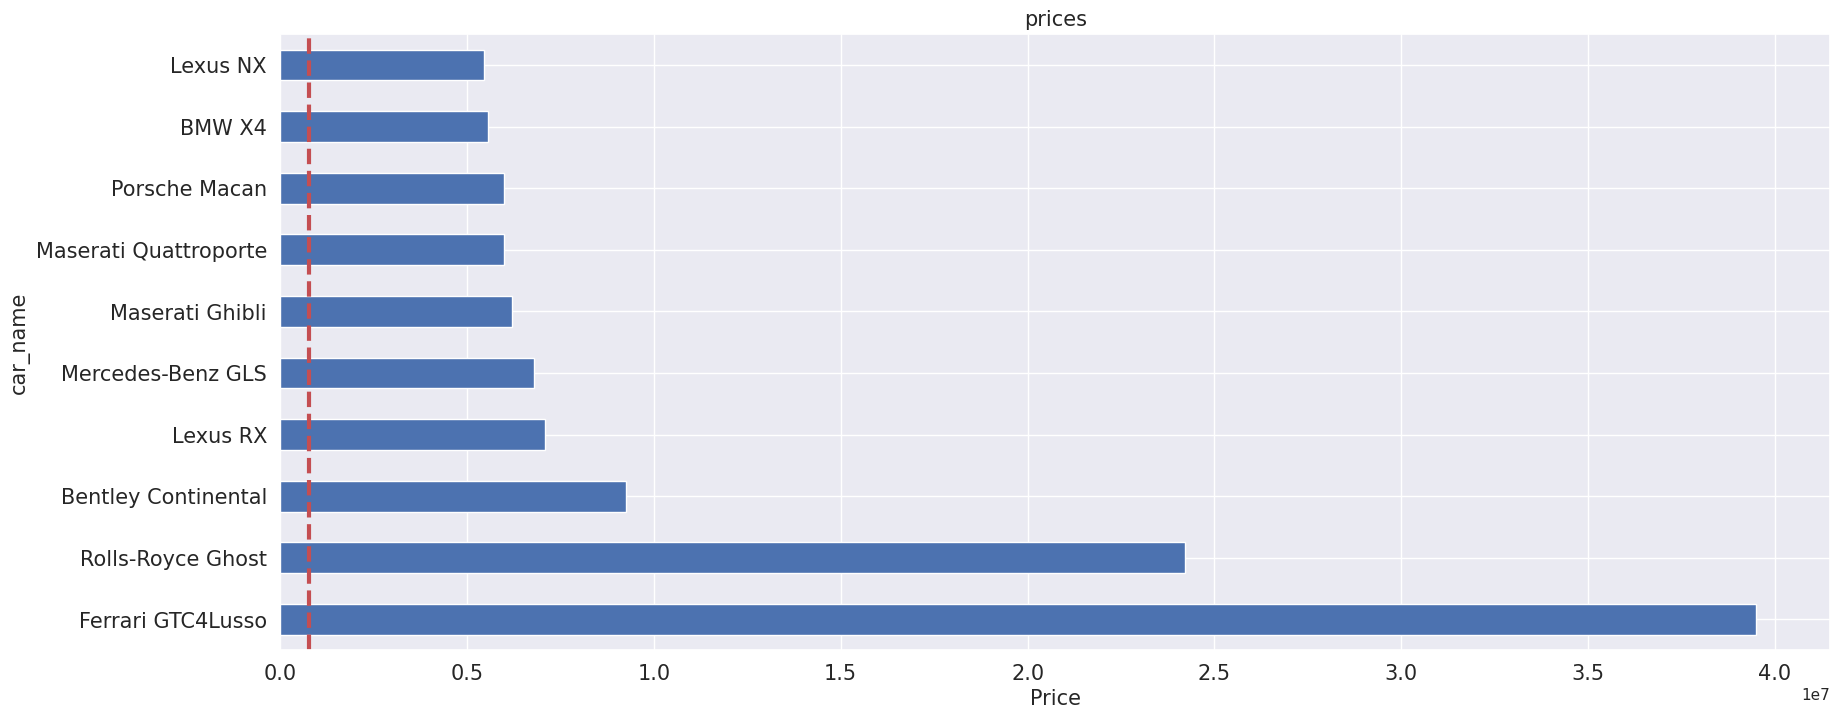

In [ ]:
train[['car_name','price']].groupby('car_name').mean().sort_values(by='price', ascending = False).head(10).plot(kind = 'barh', grid = True, figsize = (20,8),
        fontsize = 15, rot =0, legend = None)
plt.axvline(train['price'].mean(), color='r', linestyle='dashed', linewidth=3,label='the mean')
plt.xlabel('Price', fontsize = 15)
plt.ylabel('car_name', fontsize = 15)
plt.title("prices", fontsize = 15)
plt.show()

In [ ]:
correlation = train[numeric].corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price          1.000000
max_power      0.751058
engine         0.585713
seats          0.115299
km_driven     -0.079548
vehicle_age   -0.241228
mileage       -0.305128
Name: price, dtype: float64 



Index(['price', 'max_power', 'engine', 'seats', 'km_driven', 'vehicle_age',
       'mileage'],
      dtype='object')


<Axes: >

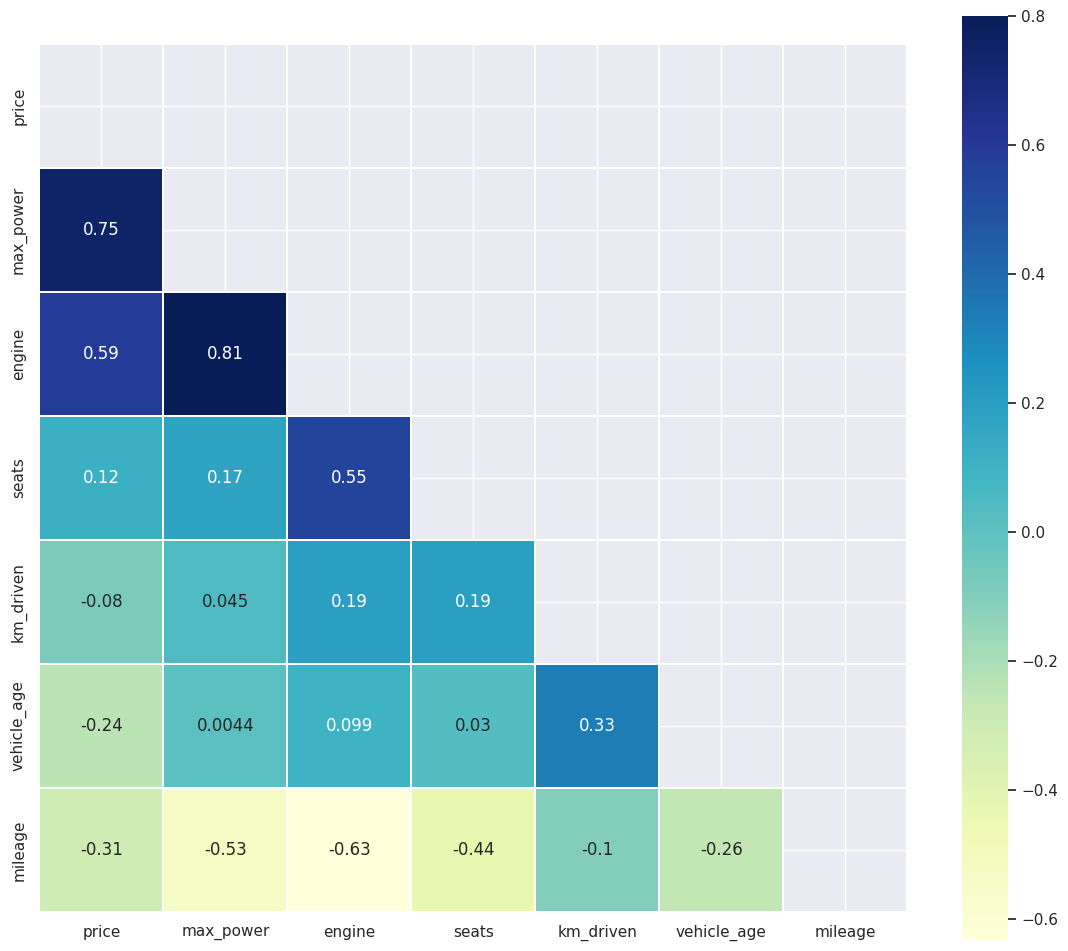

In [ ]:
k= 10
cols = correlation.nlargest(k,'price').index
print(cols)
cm = np.corrcoef(train[cols].values.T)
mask = np.triu(np.ones_like(train[cols].corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

# Thank you